In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 8 Task

In [9]:
def dichotomy(func, x0, x1, step=1e-3, eps=1e-6):
    left = x0
    right = x0 + step
    # find zero
    while right + step < x1 and func(left) * func(right) > 0:
        left, right = right, right + step

    # check wether we really have found a zero
    if func(left) * func(right) > 0:
        return None
    middle = (left + right) / 2
    while np.abs(func(middle)) > eps:
        if func(left) * func(middle) < 0:
            right = middle
        else:
            left = middle
        middle = (left + right) / 2
    return middle

def find_all_zeros(func_builder, x0, x1, step = 1e-3, eps = 1e-6):
    res = []
    n = 1
    while True:
        zero = dichotomy(func_builder(n), x0, x1, step, eps)
        if zero is None:
            break
        #print('#%d zero found' % n)
        res.append(zero)
        n += 1
        if n == 3:
            break
    return res

def lj_potential(x):
    return 4*(np.power(x, -12) - np.power(x, -6))

In [10]:
m = 1.790476689362e-27# kg
h = 1.0545718e-34
a = 6.5926e-11 # m
E0 = 0.00001
dE = 0.0001
N = 500
n = int(N / 2)

m = 1
h = 1
x = np.linspace(0.00001, 1, N)

In [16]:
def find_psi(E):
    k = 2 * m * (E - lj_potential(x)) / (h ** 2)
    psi_minus = np.zeros(n)

    psi_minus[n-2] = 1
    for i in range(n-3, -1, -1):
        s = ( (2*(1 - (5*(k[i+1]*h)**2)/12))*psi_minus[i+1]
                             - (1 + ((h* k[i+2])**2) /12)*psi_minus[i+2]) / (1 + ( (h* k[i])**2)/12)
        psi_minus[i] = ( (2*(1 - (5*(k[i+1]*h)**2)/12))*psi_minus[i+1]
                             - (1 + ((h* k[i+2])**2) /12)*psi_minus[i+2]) / (1 + ( (h* k[i])**2)/12)
    psi_plus = np.zeros(n)
    psi_plus[1] = 1

    for i in range (2, n - 2):
        psi_plus[i] = ( (2*(1 - (5*(k[i-1]*h)**2)/12))*psi_plus[i-1]
                             - (1 + ( (h* k[i-2])**2) /12)*psi_plus[i+2]) / (1 + ( (h* k[i])**2)/12)
    #print(psi_plus)
    psi = np.concatenate([psi_minus, psi_plus])
    psi *= psi_plus[n-1]/psi_minus[n-1]
    return psi

In [17]:
def find_E():
    E = E0
    res = []
    psi = find_psi(E0)
    while E < 1:
        while abs(psi[N-1] ) > 0.0001:
            E += dE
            psi = find_psi(E)
        res.append(E)
        E += dE
    #куда дихотомию?? в кунине вроде так предлагают
    #значения К какие-то дикие

In [18]:
result = find_E()


def get_bounds(En):
    dx = np.sqrt(1+En)
    x0 = np.power(0.5*(1 + dx), -1/6) + 1e-5
    x1 = np.power(0.5*(1 - dx), -1/6)
    return x0, x1

IndexError: index 248 is out of bounds for axis 0 with size 200

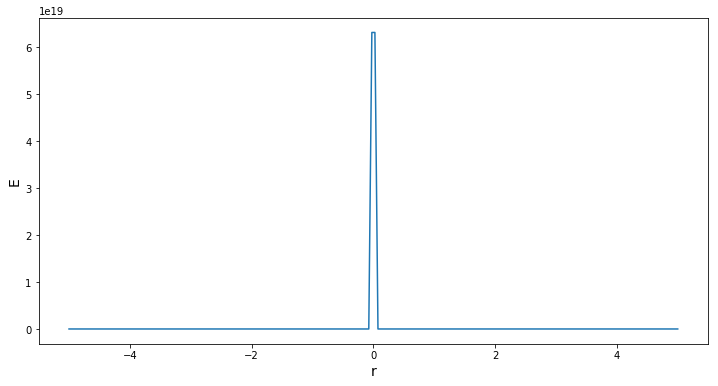

In [19]:
x = np.linspace(-5, 5, 200)
y = lj_potential(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y)

# for i, zero in enumerate(result):
#     x0, x1 = get_bounds(zero)
#     plt.hlines(zero, x0, x1)
#     plt.text(x1 + 0.05, zero, 'E{:d}={:g}'.format(i + 1, zero), fontsize=12, verticalalignment='center')

# print(zeros[1:] - zeros[:-1])
plt.xlabel('r', fontsize=14)
plt.ylabel('E', fontsize=14)

plt.show()